In [1]:
import pandas as pd
import ast 
import pandas as pd 
import numpy as np 
import sklearn as skl
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
import math

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
import os
#THIS_FOLDER = os.path.dirname(os.path.abspath(__file__))
#my_file = os.path.join(THIS_FOLDER, 'myfile.txt')

In [3]:
df = pd.read_csv('sampler_671.csv', header =0)

In [4]:
df

,Unnamed: 0,Unnamed: 0.1,artist,timestamp,similars,tags,track_id,title
0,70530,70530,Caetano Veloso,2011-08-10 11:20:56.295466,"[['TRYNMZY12903CA8E1E', 0.541769], ['TRXNTAD12...","[['tropicalia', '100'], ['mpb', '100'], ['ener...",TRJZGTA128F9312D1F,A Luz De Tieta
1,50410,50410,The Pretenders,2011-08-11 06:36:45.175755,[],"[['rock', '100'], ['acoustic', '100'], ['indie...",TRODUVR128F92E2329,Nothing Breaks Like a Heart
2,132834,132834,Ultrabeat,2011-08-03 15:03:28.354306,"[['TRKTBLX128F428412B', 0.90692], ['TRZBKSJ128...","[['jytakampaa', '100'], ['aerodance', '100'], ...",TRVNTSO128F4284128,1000 Kisses
3,177084,177084,Holy Fuck,2011-08-08 16:05:11.997170,"[['TRBFCSM128F42629F1', 1], ['TRDZTKM128F42629...","[['experimental', '100'], ['alternative', '60'...",TRXJUGX128F42629F8,Bontempi Latin
4,58690,58690,Arcadia,2011-08-04 07:03:34.630701,"[['TRNQLBS128F14571A9', 1], ['TRDLWLL128F14571...","[['80s', '100'], ['new wave', '60'], ['sting',...",TROKVJE128F14571A8,The Promise
...,...,...,...,...,...,...,...,...
10688,169069,169069,ATB,2011-08-15 11:43:14.442246,"[['TRRDUAO128F14A03E2', 0.896112], ['TRRRTTF12...","[['trance', '100'], ['dance', '36'], ['chillou...",TRXTCJX128F14A03D7,Gentle Melody
10689,18709,18709,Leon Russell,2011-08-16 01:20:24.691574,"[['TRGBOGS128F92C1E7C', 0.932304], ['TREUSOF12...","[['rock', '100'], ['singer-songwriter', '72'],...",TRSDNCP128F92FAACA,Stranger In A Strange Land
10690,113147,113147,Big Sugar,2011-08-04 22:25:03.454069,"[['TRQDZOA128F1467F9F', 0.135547], ['TRBLFCI12...","[['rock', '100'], ['Canadian', '66'], ['blues'...",TRDJFUW12903CE4271,Dear Mr. Fantasy
10691,47945,47945,Lorez Alexandria,2011-08-01 14:43:12.453855,"[['TRDPDRG128F9316A63', 1], ['TRDBZWP128F9316A...","[['jazz', '100'], ['jazz vocal', '100'], ['Blu...",TROJRHA128F9316A67,Angel Eyes


In [5]:
tag_master_list = df.tags.tolist()

In [6]:
import ast 

formatted_tags = [] 
for track_tags in tag_master_list:
    lists = ast.literal_eval(track_tags)
    formatted_tags.append(lists)

In [7]:
type(formatted_tags[0])

list

In [8]:
df['listed_tags'] = formatted_tags

In [9]:
row_tags = formatted_tags[1]

content = row_tags
for indiv_tag in content:
    print(indiv_tag)

['rock', '100']
['acoustic', '100']
['indie', '100']
['reggae', '100']
['new wave', '100']
['female vocalists', '100']
['heartbreak', '100']
['the pretenders', '100']
['missing her', '100']
['M 1', '100']
['The Pretenders-Nothing Breaks like a heart', '100']
['good', '0']


In [10]:
sims_master_list = df.similars.tolist()

import ast 
formatted_sims = [] 
for track_sims in sims_master_list:
    lists = ast.literal_eval(track_sims)
    formatted_sims.append(lists)
    
row_sims = formatted_sims[1]
content = row_sims
for indiv_sim in content:
    print(indiv_sim)

In [11]:
df['listed_sims'] = formatted_sims

In [12]:
df[ df.artist == 'Björk'] #253128

,Unnamed: 0,Unnamed: 0.1,artist,timestamp,similars,tags,track_id,title,listed_tags,listed_sims
7478,253128,253128,Björk,2011-08-03 19:25:53.648756,"[['TRNAQBJ128F42B87E9', 0.0880913], ['TRWSDTJ1...","[['electronic', '100'], ['alternative', '76'],...",TRYLMAS128F931A0E4,Alarm Call,"[[electronic, 100], [alternative, 76], [experi...","[[TRNAQBJ128F42B87E9, 0.0880913], [TRWSDTJ128F..."


### Networks Approach

In [13]:
import pandas as pd 
import numpy as np 
import sklearn as skl
import networkx as nx
import matplotlib.pyplot as plt

#### Prepare the Edgelist

In [14]:
adds = []
for index, row in df.iterrows():
    fromN = row.track_id
    f = ast.literal_eval(row.similars)
    for x in f:
        toN = x[0]
        wght = x[1]
        instance_dict = {
            'from_node': fromN,
            'to_node': toN,
            'weight': wght
        }
        adds.append(instance_dict)
        
edge_list = pd.DataFrame(adds)

In [15]:
edge_list.sample()

,from_node,to_node,weight
751759,TRKTLLH128F148ADE4,TRYQFCW12903CE3056,0.176832


In [16]:
print(len(edge_list), len(edge_list.drop_duplicates()))

910492 910492


In [17]:
10693**2

114340249

### Use Networkx to invent Graph

In [18]:
G = nx.from_pandas_edgelist(edge_list, 'from_node', 'to_node', create_using=nx.DiGraph())

In [19]:
print(f"There are {len(G.nodes)} tracks present in the network.")
print(f"And– {len(G.edges)} connections.")

There are 274914 tracks present in the network.
And– 910491 connections.


In [21]:
#nx.average_shortest_path_length(G) #Graph is not weakly connected. 

In [22]:
#transivity 
print(f" the transitivity for the amazon dataset is {round(nx.transitivity(G), 3)}.")

 the transitivity for the amazon dataset is 0.004.


In [23]:
print(f" The clustering coefficient for the dataset is: {round(nx.average_clustering(G), 3)}.")

 The clustering coefficient for the dataset is: 0.05.


In [24]:
#pr = nx.pagerank(G) %%% 
pr = nx.pagerank(G, alpha=0.5, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

{k: v for k, v in sorted(pr.items(), key=lambda item: item[1])[-3:-1]} #[-11:-1]

{'TRAVMBN12903CB87F4': 5.416464030629101e-06,
 'TRXKCMA128F4265A46': 5.417054677894213e-06}

In [25]:
top_list = [
    'TRCSBDF128F423CCB2',
 'TRZCAHK128F931E72E',
 'TRHBHSM12903D056D2',
 'TRITONL128F42424DB',
 'TRCPWIH128F42424E1',
 'TRBXCZI128F14A08A1',
 'TRDRSFC128F14A089A',
 'TRLOESW128F93347F7',
 'TRJAPTT12903CC4719',
 'TRSVPXJ12903CC471B',
 'TRKLPPN12903CB411B',
 'TRPJIIW128F9309E25',
 'TRYOQJH128F9309E22',
 'TRADEIK12903CB6152',
 'TRMDYTB128F426B4E1',
 'TRUMMTH128F426CE32',
 'TROSTAP128F931DD06',
 'TRWIJDT128F931DD0D',
 'TRWREWI128F42424D5',
 'TRWDLUW128F1478028',
 'TRXHNXQ128F42424D8',
 'TRJXTQV12903CCC049',
 'TRRISDR128F9334923',
 'TRHMLFF128F1478023',
 'TRYTDTM128F4213000',
 'TRKSSKL128F9308E69',
 'TRAJCVA128F426C51D',
 'TRRGHXD12903CEAD58',
 'TRAVMBN12903CB87F4',
 'TRXKCMA128F4265A46'  
]

df[ df['track_id'].isin(top_list)]

,Unnamed: 0,Unnamed: 0.1,artist,timestamp,similars,tags,track_id,title,listed_tags,listed_sims


In [26]:
edge_list

,from_node,to_node,weight
0,TRJZGTA128F9312D1F,TRYNMZY12903CA8E1E,0.541769
1,TRJZGTA128F9312D1F,TRXNTAD128F425FC67,0.343002
2,TRJZGTA128F9312D1F,TRWJXZZ128F1478671,0.328282
3,TRJZGTA128F9312D1F,TRVWDBJ128F42589A2,0.317476
4,TRJZGTA128F9312D1F,TRPGHHB128F92EE209,0.303829
...,...,...,...
910487,TRJQUWK128F42347DF,TRRPVKU12903CC7608,0.016234
910488,TRJQUWK128F42347DF,TRQIHPA12903D07A2A,0.016234
910489,TRJQUWK128F42347DF,TRALJVF12903D0758D,0.016234
910490,TRJQUWK128F42347DF,TRKYIMX128F93284FD,0.016234


In [27]:
all = df.track_id

In [28]:
edge_list['contained'] = edge_list.to_node.isin(df.track_id).astype(str)

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(edge_list['contained'])
le.classes_

edge_list['contained'] = le.transform(edge_list['contained'])

#le.inverse_transform([0, 0, 1, 2])

#selected_edges = edge_list[ edge_list.contained == 1 ]

In [30]:
selected_edges = edge_list[ edge_list.contained == 1 ]

250,000 are being referenced when the same is only 10,000. 
Instead, trying to limit graph to only nodes where to_node is also in sample data. 

In [31]:
G = nx.from_pandas_edgelist(selected_edges, 'from_node', 'to_node', create_using=nx.DiGraph())

In [32]:
node_list = list(G.nodes())

In [33]:
clusters = nx.clustering( G )
PageRank = nx.pagerank( G, alpha= .5 )
DegreeCentrality = nx.closeness_centrality( G )

In [34]:
CloseCentrality = nx.closeness_centrality( G )
BetweenessCentrality = nx.betweenness_centrality( G )
Degree = dict( G.degree ) # a simplified scoring of connectivity 
HaromicCentrality = nx.harmonic_centrality( G )

#I did some explorations with Harmonic Centrality, but it does 
#not clearly translate to node / local scoring I found. 

In [35]:
"""from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw(G, node_size= 5 ,with_labels=False, node_color='#b88fbf')

# plt.show()
plt.savefig("Network_graph.png", format="PNG")"""

'from matplotlib.pyplot import figure\nfigure(figsize=(10, 8))\nnx.draw(G, node_size= 5 ,with_labels=False, node_color=\'#b88fbf\')\n\n# plt.show()\nplt.savefig("Network_graph.png", format="PNG")'

In [36]:
complete = [] # will gather row by row the scores 

for node in list(G.nodes()):
  row_complete = {} #add all scores for row to dict 
  row_complete['track_id'] = node
  try:
    row_complete['Cluster'] = clusters[ node ] 
    row_complete['PageRank'] = PageRank[ node ]
    row_complete['DegreeCentrality'] = DegreeCentrality[ node ]
    row_complete['ClosenessCentrality'] = CloseCentrality[ node ]
    row_complete['BetweennessCentrality'] = BetweenessCentrality[ node ]
    row_complete['Degree'] = Degree[ node ]
    #row_complete['Partion'] = Partion[ node ]
    
    #try:
      #row_complete['HarmonicCentrality'] = HarmonicCentrality[ node ]
      #row_complete['AvgNodeConnectivity'] = AvgNodeConnectivity[ node ]
    #except:
      #row_complete['HarmonicCentrality'] = np.nan

  except:
    # this block really became necessary when I was trying out different
    # 'out there' scoring methods 
    row_complete['Cluster'] = np.nan 
    row_complete['PageRank'] = np.nan 
    row_complete['DegreeCentrality'] = np.nan 
    row_complete['ClosenessCentrality'] = np.nan 
    row_complete['BetweennessCentrality'] = np.nan 
    row_complete['Degree'] = np.nan 
    #row_complete['Partion'] = np.nan 
    #row_complete['HarmonicCentrality'] = np.nan 
    #row_complete['AvgNodeConnectivity'] = np.nan
    
  complete.append(row_complete)

TWO = pd.DataFrame.from_dict(complete, orient='columns')

TWO.sample(5)

,track_id,Cluster,PageRank,DegreeCentrality,ClosenessCentrality,BetweennessCentrality,Degree
3141,TRVXODA128F92C44AF,0.00000,0.000091,0.000132,0.000132,3.760355e-05,2
3637,TRDJIKZ128EF343C43,0.00000,0.000073,0.000000,0.000000,0.000000e+00,3
4016,TRXWJYF128F4259980,0.00000,0.000113,0.000330,0.000330,0.000000e+00,2
2770,TRVFCWE12903CB0413,0.00000,0.000310,0.038263,0.038263,3.465066e-04,4
148,TRORLEN128F92F41C9,0.30303,0.000276,0.001002,0.001002,5.488933e-07,9


In [37]:
three = pd.merge(left = df, right = TWO, how = 'left', on = 'track_id')

In [38]:
three.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'artist', 'timestamp', 'similars', 'tags',
       'track_id', 'title', 'listed_tags', 'listed_sims', 'Cluster',
       'PageRank', 'DegreeCentrality', 'ClosenessCentrality',
       'BetweennessCentrality', 'Degree'],
      dtype='object')

<AxesSubplot:>

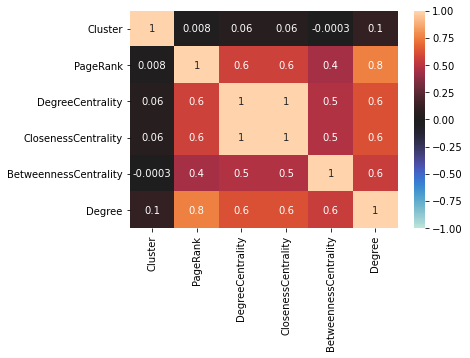

In [39]:
###Let's check out correlation in coefficients before we begin to fit models 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.heatmap(three.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'artist', 'timestamp', 'similars', 'tags',
       'track_id', 'title', 'listed_tags']).corr(), annot = True, fmt='.1g', vmin=-1, 
        vmax=1, center= 0)

In [40]:
three.sample(5)

,Unnamed: 0,Unnamed: 0.1,artist,timestamp,similars,tags,track_id,title,listed_tags,listed_sims,Cluster,PageRank,DegreeCentrality,ClosenessCentrality,BetweennessCentrality,Degree
9541,27192,27192,Matmatah,2011-08-12 06:39:55.013929,"[['TRQVLNX128F92E6F67', 0.951539], ['TRKLPQI12...","[['rock', '100'], ['rock francais', '57'], ['c...",TRSKPWL128F92E6F6D,Derrière Ton Dos,"[[rock, 100], [rock francais, 57], [chanson fr...","[[TRQVLNX128F92E6F67, 0.951539], [TRKLPQI128F4...",0.117188,0.000182,0.037963,0.037963,0.001652,12.0
2054,1008,1008,Yelle,2011-08-08 19:00:39.351592,[],"[['club misfits', '100']]",TRSRKGQ128F9320636,A Cause Des Garçons (Punks Jump Up Remix),"[[club misfits, 100]]",[],NaN,NaN,NaN,NaN,NaN,NaN
4871,178574,178574,Bryan Kearney,2011-09-07 18:16:55.034932,[],"[['trance', '100'], ['electronic', '100']]",TRXCTRD128F92D6E89,The Walrus,"[[trance, 100], [electronic, 100]]",[],NaN,NaN,NaN,NaN,NaN,NaN
1025,84216,84216,The Sensational Alex Harvey Band,2011-08-03 02:52:22.394495,"[['TRZSXBS128F4268C9C', 0.077963], ['TRSRUTU12...","[['hard rock', '100'], ['rock', '50'], ['class...",TRJVAIH128F92CAE4B,Hole In Her Stocking,"[[hard rock, 100], [rock, 50], [classic rock, ...","[[TRZSXBS128F4268C9C, 0.077963], [TRSRUTU128F4...",0.023256,0.000181,0.065253,0.065253,0.000844,10.0
6315,162074,162074,Celelalte cuvinte,2011-08-08 11:53:20.623725,"[['TRQVJWV128F422766C', 1], ['TRCXRLW128F42276...","[['romanian rock', '100'], ['rock romanesc', '...",TRXRPDF128F4227665,Zodia (Astrological Sign),"[[romanian rock, 100], [rock romanesc, 100], [...","[[TRQVJWV128F422766C, 1], [TRCXRLW128F4227668,...",NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
similars_master_list = three.similars.tolist()

import ast 
formatted_sims = [] 
for track_sims in similars_master_list:
    lists = ast.literal_eval(track_sims)
    formatted_sims.append(lists)
    
type(formatted_sims[0])

three['listed_similars'] = formatted_sims

row_sims = formatted_sims[1]
content = row_sims
for indiv_tag in content:
    print(indiv_tag)

In [42]:
three['listed_similars']

0        [[TRYNMZY12903CA8E1E, 0.541769], [TRXNTAD128F4...
1                                                       []
2        [[TRKTBLX128F428412B, 0.90692], [TRZBKSJ128F42...
3        [[TRBFCSM128F42629F1, 1], [TRDZTKM128F42629E7,...
4        [[TRNQLBS128F14571A9, 1], [TRDLWLL128F14571A6,...
                               ...                        
10688    [[TRRDUAO128F14A03E2, 0.896112], [TRRRTTF128F9...
10689    [[TRGBOGS128F92C1E7C, 0.932304], [TREUSOF128E0...
10690    [[TRQDZOA128F1467F9F, 0.135547], [TRBLFCI128F9...
10691    [[TRDPDRG128F9316A63, 1], [TRDBZWP128F9316A6A,...
10692    [[TRQDVUS128F9342D5B, 0.700153], [TRITYRJ128F9...
Name: listed_similars, Length: 10693, dtype: object

In [43]:
three

,Unnamed: 0,Unnamed: 0.1,artist,timestamp,similars,tags,track_id,title,listed_tags,listed_sims,Cluster,PageRank,DegreeCentrality,ClosenessCentrality,BetweennessCentrality,Degree,listed_similars
0,70530,70530,Caetano Veloso,2011-08-10 11:20:56.295466,"[['TRYNMZY12903CA8E1E', 0.541769], ['TRXNTAD12...","[['tropicalia', '100'], ['mpb', '100'], ['ener...",TRJZGTA128F9312D1F,A Luz De Tieta,"[[tropicalia, 100], [mpb, 100], [energizing, 1...","[[TRYNMZY12903CA8E1E, 0.541769], [TRXNTAD128F4...",0.000000,0.000073,0.000000,0.000000,0.000000e+00,2.0,"[[TRYNMZY12903CA8E1E, 0.541769], [TRXNTAD128F4..."
1,50410,50410,The Pretenders,2011-08-11 06:36:45.175755,[],"[['rock', '100'], ['acoustic', '100'], ['indie...",TRODUVR128F92E2329,Nothing Breaks Like a Heart,"[[rock, 100], [acoustic, 100], [indie, 100], [...",[],NaN,NaN,NaN,NaN,NaN,NaN,[]
2,132834,132834,Ultrabeat,2011-08-03 15:03:28.354306,"[['TRKTBLX128F428412B', 0.90692], ['TRZBKSJ128...","[['jytakampaa', '100'], ['aerodance', '100'], ...",TRVNTSO128F4284128,1000 Kisses,"[[jytakampaa, 100], [aerodance, 100], [beatful...","[[TRKTBLX128F428412B, 0.90692], [TRZBKSJ128F42...",0.000000,0.000184,0.000588,0.000588,1.219763e-07,4.0,"[[TRKTBLX128F428412B, 0.90692], [TRZBKSJ128F42..."
3,177084,177084,Holy Fuck,2011-08-08 16:05:11.997170,"[['TRBFCSM128F42629F1', 1], ['TRDZTKM128F42629...","[['experimental', '100'], ['alternative', '60'...",TRXJUGX128F42629F8,Bontempi Latin,"[[experimental, 100], [alternative, 60], [indi...","[[TRBFCSM128F42629F1, 1], [TRDZTKM128F42629E7,...",0.000000,0.000073,0.000000,0.000000,0.000000e+00,1.0,"[[TRBFCSM128F42629F1, 1], [TRDZTKM128F42629E7,..."
4,58690,58690,Arcadia,2011-08-04 07:03:34.630701,"[['TRNQLBS128F14571A9', 1], ['TRDLWLL128F14571...","[['80s', '100'], ['new wave', '60'], ['sting',...",TROKVJE128F14571A8,The Promise,"[[80s, 100], [new wave, 60], [sting, 53], [new...","[[TRNQLBS128F14571A9, 1], [TRDLWLL128F14571A6,...",0.035714,0.000145,0.062292,0.062292,1.049962e-04,8.0,"[[TRNQLBS128F14571A9, 1], [TRDLWLL128F14571A6,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,169069,169069,ATB,2011-08-15 11:43:14.442246,"[['TRRDUAO128F14A03E2', 0.896112], ['TRRRTTF12...","[['trance', '100'], ['dance', '36'], ['chillou...",TRXTCJX128F14A03D7,Gentle Melody,"[[trance, 100], [dance, 36], [chillout, 27], [...","[[TRRDUAO128F14A03E2, 0.896112], [TRRRTTF128F9...",0.166667,0.000084,0.000176,0.000176,3.754547e-05,6.0,"[[TRRDUAO128F14A03E2, 0.896112], [TRRRTTF128F9..."
10689,18709,18709,Leon Russell,2011-08-16 01:20:24.691574,"[['TRGBOGS128F92C1E7C', 0.932304], ['TREUSOF12...","[['rock', '100'], ['singer-songwriter', '72'],...",TRSDNCP128F92FAACA,Stranger In A Strange Land,"[[rock, 100], [singer-songwriter, 72], [house ...","[[TRGBOGS128F92C1E7C, 0.932304], [TREUSOF128E0...",0.000000,0.000073,0.000000,0.000000,0.000000e+00,2.0,"[[TRGBOGS128F92C1E7C, 0.932304], [TREUSOF128E0..."
10690,113147,113147,Big Sugar,2011-08-04 22:25:03.454069,"[['TRQDZOA128F1467F9F', 0.135547], ['TRBLFCI12...","[['rock', '100'], ['Canadian', '66'], ['blues'...",TRDJFUW12903CE4271,Dear Mr. Fantasy,"[[rock, 100], [Canadian, 66], [blues, 33], [al...","[[TRQDZOA128F1467F9F, 0.135547], [TRBLFCI128F9...",0.210526,0.000199,0.040998,0.040998,8.834861e-05,7.0,"[[TRQDZOA128F1467F9F, 0.135547], [TRBLFCI128F9..."
10691,47945,47945,Lorez Alexandria,2011-08-01 14:43:12.453855,"[['TRDPDRG128F9316A63', 1], ['TRDBZWP128F9316A...","[['jazz', '100'], ['jazz vocal', '100'], ['Blu...",TROJRHA128F9316A67,Angel Eyes,"[[jazz, 100], [jazz vocal, 100], [Blues Bar, 1...","[[TRDPDRG128F9316A63, 1], [TRDBZWP128F9316A6A,...",0.000000,0.000073,0.000000,0.000000,0.000000e+00,2.0,"[[TRDPDRG128F9316A63, 1], [TRDBZWP128F9316A6A,..."


In [47]:
three.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'artist', 'timestamp', 'similars', 'tags',
       'track_id', 'title', 'listed_tags', 'listed_sims', 'Cluster',
       'PageRank', 'DegreeCentrality', 'ClosenessCentrality',
       'BetweennessCentrality', 'Degree', 'listed_similars'],
      dtype='object')

In [54]:
X = three.drop(columns=['listed_sims', 'Unnamed: 0', 'Unnamed: 0.1', 'artist', 'timestamp', 'similars', 'tags',
       'track_id', 'title', 'listed_tags','listed_similars']).fillna(0)
X.fillna(0, inplace = True)

In [56]:
# KNN 
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nbrs.fit(X)
distances, indices = nbrs.kneighbors(X)
indices

array([[10691,  6866,  4423, ...,  6948,  6818,  6826],
       [ 2239,     9,  9174, ...,   251,   552,     1],
       [    2,  3076,  6788, ...,  3711,  9519,  3817],
       ...,
       [10690, 10316,  2437, ...,   682,  4001,  4941],
       [10691,  6866,  4423, ...,  6948,  6818,  6826],
       [10692,  3711, 10557, ...,   159,  8683,  1559]])

In [57]:
three[ three.artist == 'Björk'] # 253128

,Unnamed: 0,Unnamed: 0.1,artist,timestamp,similars,tags,track_id,title,listed_tags,listed_sims,Cluster,PageRank,DegreeCentrality,ClosenessCentrality,BetweennessCentrality,Degree,listed_similars
7478,253128,253128,Björk,2011-08-03 19:25:53.648756,"[['TRNAQBJ128F42B87E9', 0.0880913], ['TRWSDTJ1...","[['electronic', '100'], ['alternative', '76'],...",TRYLMAS128F931A0E4,Alarm Call,"[[electronic, 100], [alternative, 76], [experi...","[[TRNAQBJ128F42B87E9, 0.0880913], [TRWSDTJ128F...",0.0,0.000073,0.0,0.0,0.0,2.0,"[[TRNAQBJ128F42B87E9, 0.0880913], [TRWSDTJ128F..."


### Losing a Whole Year, Third Eye Blind

In [58]:
three[ three.artist == 'Third Eye Blind']

,Unnamed: 0,Unnamed: 0.1,artist,timestamp,similars,tags,track_id,title,listed_tags,listed_sims,Cluster,PageRank,DegreeCentrality,ClosenessCentrality,BetweennessCentrality,Degree,listed_similars
9758,184915,184915,Third Eye Blind,2011-08-11 20:04:22.765768,"[['TRLGTNS128F147C7C3', 1], ['TRVVRIZ128F147C7...","[['alternative rock', '100'], ['rock', '66'], ...",TRXEFKY128F147C7C0,Losing A Whole Year (2006 Remastered LP Version),"[[alternative rock, 100], [rock, 66], [alterna...","[[TRLGTNS128F147C7C3, 1], [TRVVRIZ128F147C7CC,...",0.055556,0.000161,0.051453,0.051453,0.000096,8.0,"[[TRLGTNS128F147C7C3, 1], [TRVVRIZ128F147C7CC,..."


In [59]:
for x in indices:
    for y in x:
        if y == 9758:
            print(x.tolist())

[848, 6362, 7742, 9758, 3513, 3539, 8903, 4188, 5548, 1179]
[3513, 3539, 9758, 8903, 6362, 848, 7742, 4188, 5548, 1179]
[3539, 3513, 9758, 8903, 6362, 848, 7742, 4188, 5548, 1179]
[4188, 5548, 7742, 848, 6362, 1179, 8903, 9758, 3513, 3539]
[5548, 4188, 7742, 6362, 848, 1179, 8903, 9758, 3649, 3513]
[6362, 7742, 848, 8903, 9758, 3513, 3539, 4188, 5548, 1179]
[7742, 6362, 848, 8903, 9758, 3513, 3539, 4188, 5548, 1179]
[8903, 3513, 3539, 9758, 6362, 7742, 848, 4188, 5548, 7534]
[9758, 3513, 3539, 8903, 6362, 848, 7742, 4188, 5548, 1179]


In [60]:
int = 1
teb_lawy = [9758, 3513, 3539, 8903, 6362, 848, 7742, 4188, 5548, 1179]

for i in teb_lawy:
    print(f"""{int}. 
    artist:{three.artist.iloc[i]}, 
    title: {three.title.iloc[i]})
    tags: {three.listed_tags.iloc[i]}
    metrics: {three.Degree.iloc[i]}, {three.Cluster.iloc[i]}, {three.DegreeCentrality.iloc[i]}""")
    int += 1 

1. 
    artist:Third Eye Blind, 
    title: Losing A Whole Year (2006 Remastered LP Version))
    tags: [['alternative rock', '100'], ['rock', '66'], ['alternative', '66'], ['90s', '66'], ['one star', '33'], ['bpluscoop', '33'], ['woocoop', '33'], ['aitch', '33'], ['4 Stars', '33'], ['Pop-Rock', '33'], ['good songs', '33'], ['pop', '33'], ['indie', '33'], ['Usual', '0'], ['song', '0'], ['loved tracks', '0'], ['not hair metal', '0'], ['dmitry', '0'], ['Mal anhoeren', '0']]
    metrics: 8.0, 0.05555555555555555, 0.05145269963733909
2. 
    artist:Yim Yames, 
    title: My Sweet Lord)
    tags: [['cover', '100'], ['hallelujah', '66'], ['my sweet lord', '66'], ['Yim Yames', '66'], ['covers', '33'], ['classic', '33'], ['relaxing', '33'], ['Dreamy', '33'], ['george harrison', '33'], ['george harrison cover', '33'], ['Oh My God', '33'], ['Sometime Mood', '33']]
    metrics: 8.0, 0.05555555555555555, 0.05122387510804247
3. 
    artist:Onslaught, 
    title: Metal Forces)
    tags: [['thrash me

In [61]:
edge_list['teb_knn'] = edge_list.index.isin(teb_lawy).astype(str) 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(edge_list['teb_knn'])
le.classes_

edge_list['teb_knn'] = le.transform(edge_list['teb_knn'])
#le.inverse_transform([0, 0, 1, 2])

#

teb_ids = edge_list[edge_list.teb_knn == 1 ].from_node.tolist()
edge_list['teb_knn_2'] = edge_list.to_node.isin(teb_ids).astype(str)

le.fit(edge_list['teb_knn_2'])
edge_list['teb_knn_2'] = le.transform(edge_list['teb_knn_2'])

#
edge_list[ edge_list['teb_knn_2'] == 1 ]

teb_edges = edge_list[ edge_list.teb_knn == 1 ]
teb_e2 = edge_list[ edge_list.teb_knn_2 == 1 ]

print( len(teb_e2), len(teb_edges))

teb_edges = teb_edges.append(teb_e2)
len(teb_edges)

print(len(teb_edges))

G = nx.from_pandas_edgelist(teb_edges, 'from_node', 'to_node')

colors = []
for node in G:
    if node in teb_edges["teb_knn"] == 1 :
        colors.append("green")
    else: colors.append("#b88fbf")

46 10
56


In [62]:
import math
from bokeh.plotting import figure
from bokeh.models import GraphRenderer, Ellipse
from bokeh.palettes import Spectral8

In [63]:
#node_hover_tool = HoverTool(tooltips=[("Company Name", "@index")])
#plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool())

plot = figure(title="Graph Layout Demonstration", x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools="", toolbar_location=None)

graph = bokeh.models.GraphRenderer()

graph_renderer.node_renderer.data_source.data['colors'] = colors
graph_renderer.node_renderer.glyph = Circle(size=20, fill_color='colors')

graph_renderer.edge_renderer.glyph = MultiLine(line_color="red", line_alpha=0.8, line_width=1)
plot.renderers.append(graph_renderer)

output_file("boo.html")
show(plot)

NameError: name 'bokeh' is not defined

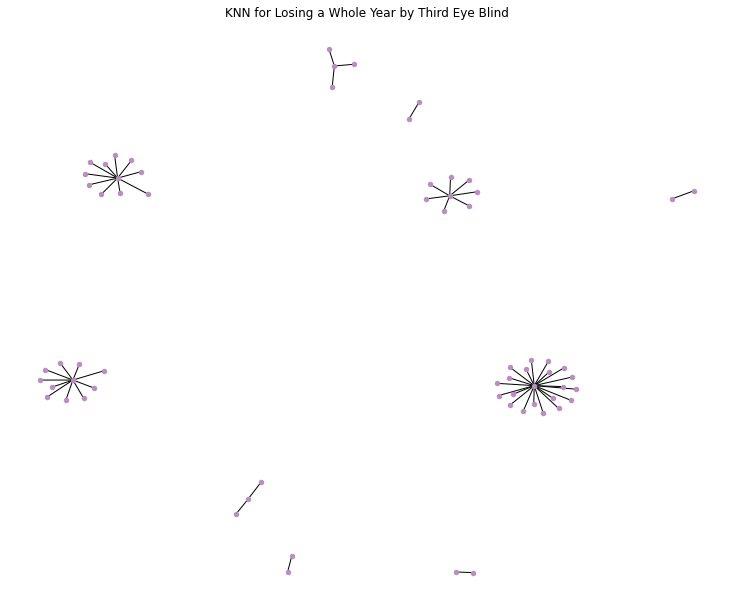

In [64]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw(G, node_size= 20 ,with_labels=False, node_color='#b88fbf')



# plt.show()
plt.title('KNN for Losing a Whole Year by Third Eye Blind')
plt.savefig("KNN_TEB.jpg", format = 'JPG')

### Roy ORbison In Dreams

In [65]:
three[ three.artist == 'Roy Orbison']

,Unnamed: 0,Unnamed: 0.1,artist,timestamp,similars,tags,track_id,title,listed_tags,listed_sims,Cluster,PageRank,DegreeCentrality,ClosenessCentrality,BetweennessCentrality,Degree,listed_similars
4749,89976,89976,Roy Orbison,2011-08-03 04:46:38.136309,"[['TRUUJHZ128F92CAB60', 1], ['TRFAPGQ12903CD88...","[['eryqahs favourites', '100']]",TRJBPKY128F92CAB65,Only Alive,"[[eryqahs favourites, 100]]","[[TRUUJHZ128F92CAB60, 1], [TRFAPGQ12903CD885E,...",0.000000,0.000093,0.056443,0.056443,0.000008,4.0,"[[TRUUJHZ128F92CAB60, 1], [TRFAPGQ12903CD885E,..."
8750,107906,107906,Roy Orbison,2011-08-04 00:26:01.465838,"[['TRCLQAJ128F930EA2A', 1], ['TRQVSLV128F426AB...","[['oldies', '100'], ['60s', '76'], ['classic r...",TRDFAGW12903D0D80C,In Dreams,"[[oldies, 100], [60s, 76], [classic rock, 40],...","[[TRCLQAJ128F930EA2A, 1], [TRQVSLV128F426AB64,...",0.132212,0.000172,0.067928,0.067928,0.004365,21.0,"[[TRCLQAJ128F930EA2A, 1], [TRQVSLV128F426AB64,..."


In [66]:
for x in indices:
    x = x.tolist()
    #print(x)
    if x[0] == 8750:
        nn_list = x
        
int = 1
for i in nn_list:
    print(f"""{int}. 
    artist:{three.artist.iloc[i]}, 
    title: {three.title.iloc[i]}""")
    int += 1 
    
"""tags: {three.listed_tags.iloc[i]}
 metrics: {three.Degree.iloc[i]}, {three.Cluster.iloc[i]}, {three.DegreeCentrality.iloc[i]}"""

1. 
    artist:Roy Orbison, 
    title: In Dreams
2. 
    artist:The Louvin Brothers, 
    title: I Don't Believe You've Met My Baby
3. 
    artist:Switchfoot, 
    title: Meant To Live
4. 
    artist:Rose Royce, 
    title: Ooh Boy
5. 
    artist:The Box Tops, 
    title: Cry like a baby
6. 
    artist:Jaydee, 
    title: Plastic Dreams
7. 
    artist:The Bloody Beetroots, 
    title: Warp 1.9 (feat. Steve Aoki)
8. 
    artist:Ian Gillan, 
    title: Texas State Of Mind
9. 
    artist:The Gap Band, 
    title: Outstanding
10. 
    artist:K's Choice, 
    title: Everything For Free


'tags: {three.listed_tags.iloc[i]}\n metrics: {three.Degree.iloc[i]}, {three.Cluster.iloc[i]}, {three.DegreeCentrality.iloc[i]}'

In [67]:
edge_list['teb_knn'] = edge_list.index.isin(nn_list).astype(str) 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(edge_list['teb_knn'])
le.classes_

edge_list['teb_knn'] = le.transform(edge_list['teb_knn'])
#le.inverse_transform([0, 0, 1, 2])

#

teb_ids = edge_list[edge_list.teb_knn == 1 ].from_node.tolist()
edge_list['teb_knn_2'] = edge_list.to_node.isin(teb_ids).astype(str)

le.fit(edge_list['teb_knn_2'])
edge_list['teb_knn_2'] = le.transform(edge_list['teb_knn_2'])

#
edge_list[ edge_list['teb_knn_2'] == 1 ]

teb_edges = edge_list[ edge_list.teb_knn == 1 ]
teb_e2 = edge_list[ edge_list.teb_knn_2 == 1 ]

print( len(teb_e2), len(teb_edges))

teb_edges = teb_edges.append(teb_e2)
len(teb_edges)

print(len(teb_edges))

G = nx.from_pandas_edgelist(teb_edges, 'from_node', 'to_node')

colors = []
for node in G:
    if node in teb_edges["teb_knn"] == 1 :
        colors.append("green")
    else: colors.append("#b88fbf")

33 10
43


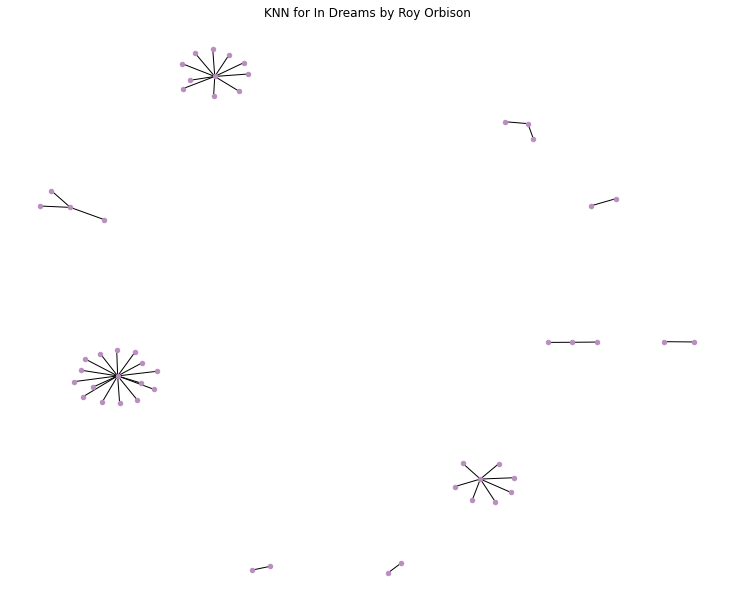

In [68]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw(G, node_size= 20 ,with_labels=False, node_color='#b88fbf')


# plt.show()
plt.title('KNN for In Dreams by Roy Orbison')
plt.savefig("KNN_INDREAMS.jpg", format = 'JPG')

### New Order Round and Round 

In [69]:
#three.artist.drop_duplicates().tolist()

In [70]:
#df[ df.artist == 'New Order']  #10479

In [71]:
nn_list = []
for x in indices:
    x = x.tolist()
    #print(x)
    if x[0] == 10479:
        nn_list = x
        
int = 1
for i in nn_list:
    print(f"""{int}. 
    artist:{three.artist.iloc[i]}, 
    title: {three.title.iloc[i]})""")
    int += 1 

1. 
    artist:New Order, 
    title: Round and Round)
2. 
    artist:Alicia Keys, 
    title: Like You'll Never See Me Again)
3. 
    artist:Playa, 
    title: Cheers 2 U)
4. 
    artist:Cygnus X, 
    title: Superstring (Rank 1 Remix))
5. 
    artist:Blue October, 
    title: Into The Ocean)
6. 
    artist:Kelly Clarkson, 
    title: Never Again)
7. 
    artist:The Killers, 
    title: Human)
8. 
    artist:Kris Kristofferson, 
    title: Nobody Wins)
9. 
    artist:Sam Collins, 
    title: The Jail House Blues)
10. 
    artist:Lustral, 
    title: Everytime)


In [72]:
edge_list['teb_knn'] = edge_list.index.isin(nn_list).astype(str) 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(edge_list['teb_knn'])
le.classes_

edge_list['teb_knn'] = le.transform(edge_list['teb_knn'])
#le.inverse_transform([0, 0, 1, 2])

#

teb_ids = edge_list[edge_list.teb_knn == 1 ].from_node.tolist()
edge_list['teb_knn_2'] = edge_list.to_node.isin(teb_ids).astype(str)

le.fit(edge_list['teb_knn_2'])
edge_list['teb_knn_2'] = le.transform(edge_list['teb_knn_2'])

#
edge_list[ edge_list['teb_knn_2'] == 1 ]

teb_edges = edge_list[ edge_list.teb_knn == 1 ]
teb_e2 = edge_list[ edge_list.teb_knn_2 == 1 ]

print( len(teb_e2), len(teb_edges))

teb_edges = teb_edges.append(teb_e2)
len(teb_edges)

print(len(teb_edges))

G = nx.from_pandas_edgelist(teb_edges, 'from_node', 'to_node')

colors = []
for node in G:
    if node in teb_edges["teb_knn"] == 1 :
        colors.append("green")
    else: colors.append("#b88fbf")

17 10
27


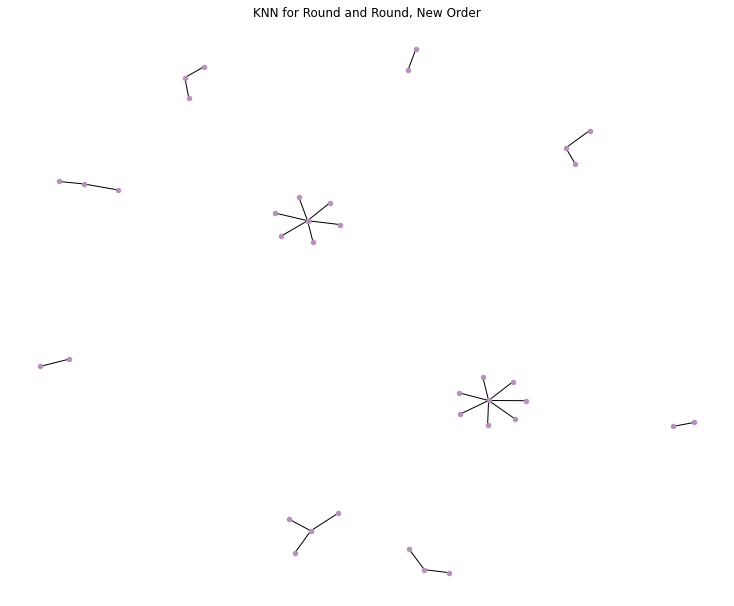

In [73]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw(G, node_size= 20 ,with_labels=False, node_color='#b88fbf')


# plt.show()
plt.title('KNN for Round and Round, New Order')
plt.savefig("KNN_NEWORDER.jpg", format = 'JPG')

# MANUAL

In [110]:
def find_manual_matches(track_index, returned_no, percent_match1, percent_match2):
    matches = [] 
    total = returned_no
    matches.append(df.track_id.iloc[track_index])
    total -= 1
    
    # find song id in df 
    ## iloc and run through similars. 
    for g in df.listed_sims.iloc[track_index]:
        if total != 0:
            if g[1] > percent_match1:
                matches.append(g[0])
                total -= 1
    
    tags_to_m = [] 
    # from tags select most similar tags 
    for g in df.listed_tags.iloc[track_index]:
        if total != 0:
            try: 
                h = int(g[1])
                if percent_match2 <= h:
                    tags_to_m.append(g[0])
            except: 
                pass
    
    sim_track_tags = []
    #compare similarity of contents. 
    for i, row in df.iterrows():
        if total != 0:
            for g in row.listed_tags:
                #print(g[0])
                if g[0] in tags_to_m:
                    #print('here')
                    h = g[1]
                    h = float(h)
                    if h > percent_match2:
                        #print('bingo')
                        matches.append(row.track_id)
                        total -= 1
                else:
                    pass
    return matches


### Roy Orbison 

In [116]:
RO_matches = find_manual_matches(8750, 24, .5, 95)
x = df[ df.track_id.isin(RO_matches)]
x[['artist', 'title']]

,artist,title
8750,Roy Orbison,In Dreams


In [117]:
df[ df.track_id == 'TRCLQAJ128F930EA2A']

,Unnamed: 0,Unnamed: 0.1,artist,timestamp,similars,tags,track_id,title,listed_tags,listed_sims


### Third Eye Blind

In [118]:
TEB_matches = find_manual_matches(9758, 24, .7, 99)
x = df[ df.track_id.isin(TEB_matches)]
x[['artist', 'title']]
#indices = 9758, 930, 1127, 939, 804, 1647, 1729, 392, 1579, 834

,artist,title
9758,Third Eye Blind,Losing A Whole Year (2006 Remastered LP Version)


### New Order

In [119]:
NO_matches = find_manual_matches(10479, 24, .7, 99)
x = df[ df.track_id.isin(NO_matches)]
x[['artist', 'title']]
#indices = 10479, 2984, 2002, 2402, 337, 563, 1, 2475, 1363, 717

,artist,title
10479,New Order,Round and Round


# Latent Semantic Indexing 

In [120]:
df[ df.artist == 'Björk'] #253128

,Unnamed: 0,Unnamed: 0.1,artist,timestamp,similars,tags,track_id,title,listed_tags,listed_sims
7478,253128,253128,Björk,2011-08-03 19:25:53.648756,"[['TRNAQBJ128F42B87E9', 0.0880913], ['TRWSDTJ1...","[['electronic', '100'], ['alternative', '76'],...",TRYLMAS128F931A0E4,Alarm Call,"[[electronic, 100], [alternative, 76], [experi...","[[TRNAQBJ128F42B87E9, 0.0880913], [TRWSDTJ128F..."


In [121]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


### Preprocessing
1. tokenize
2. remove stop words 
3. stemming (might not be applicable)

In [122]:
tags_tke =[]
for row in df.listed_tags:
    instance_tke = '' 
    for x in row:
        #print(type(x), x[0], x[1])
        instance_tke += x[0] + " "
    tags_tke.append(instance_tke)

In [133]:
tags_tke[0]

'tropicalia mpb energizing latin music Festa afoxe grew up on celebrating life sempre colocam as fotos mais ridculas do caetano no lastfm eterno retorno '

In [134]:
# initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

### Tokenize

In [135]:
texts = []
tokensl = []
for i in tags_tke:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    tokensl.append(tokens)
    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    # add tokens to list
    texts.append(stemmed_tokens)

In [136]:
df['text'] = texts

In [137]:
tag_genre_to_replace = [
    'rock',
     'pop',
     'alternative',
     'indie',
     'electronic',
     'alternative rock',
     'dance',
     'metal',
     'singer-songwriter',
     'jazz',
     'indie rock',
     'soul',
     'classic rock',
     'electronica',
     'punk',
     'instrumental',
     'folk',
     'blues',
     'oldies',
     'hard rock',
     'acoustic',
     'female vocalist',
     'ambient',
     'party',
     'guitar',
     'favourite',
     '70s',
     'easy listening']

In [147]:
tokens_cl = [] 
for entry in tokensl:
    entry_cleaned = [] 
    for word in entry:
        if word not in tag_genre_to_replace:
            entry_cleaned.append(word)
        else:
            pass
    tokens_cl.append(entry_cleaned)

In [152]:
df['text_cleaned'] = tokens_cl

In [153]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [154]:
dicto, doc_term_m = prepare_corpus(texts)
dicto2, doc_term_m2 = prepare_corpus(tokens_cl)

In [155]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [156]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [157]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values, color = 'cornflowerblue')
    plt.title('Coherence Score for LSI by Number of Topics')
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [158]:
# LSA Model
number_of_topics=8
words=10
document_list = df.track_id
titles= df.title
clean_text=texts
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '0.673*"rock" + 0.306*"song" + 0.266*"metal" + 0.220*"love" + 0.202*"pop" + 0.161*"favorit" + 0.138*"altern" + 0.114*"indi" + 0.110*"classic" + 0.109*"music"'), (1, '-0.896*"metal" + 0.160*"pop" + -0.153*"death" + 0.116*"love" + 0.107*"song" + 0.097*"rock" + -0.095*"heavi" + -0.090*"black" + 0.081*"indi" + -0.074*"melod"'), (2, '-0.613*"rock" + 0.268*"love" + 0.255*"song" + 0.242*"jazz" + 0.203*"femal" + 0.176*"soul" + 0.164*"hop" + 0.155*"danc" + 0.148*"pop" + 0.147*"metal"'), (3, '-0.786*"jazz" + -0.252*"blue" + 0.238*"song" + 0.166*"pop" + -0.162*"rock" + -0.149*"soul" + 0.131*"indi" + -0.115*"classic" + 0.115*"punk" + 0.105*"love"'), (4, '0.591*"hop" + 0.557*"hip" + 0.262*"rap" + -0.172*"femal" + -0.168*"jazz" + -0.151*"pop" + 0.110*"classic" + -0.108*"love" + -0.107*"song" + 0.098*"rock"'), (5, '0.411*"danc" + 0.347*"hous" + 0.337*"tranc" + -0.313*"song" + 0.231*"electro" + -0.216*"blue" + 0.197*"electron" + 0.157*"electronica" + 0.156*"pop" + 0.142*"techno"'), (6, '-0.408*"b

In [159]:
# LSA Model
number_of_topics=8
words=10
document_list = df.track_id
titles= df.title
clean_text=tokens_cl
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '0.410*"the" + 0.314*"songs" + 0.257*"love" + 0.224*"of" + 0.217*"to" + 0.217*"i" + 0.195*"my" + 0.176*"and" + 0.162*"music" + 0.142*"female"'), (1, '0.656*"hop" + 0.612*"hip" + 0.279*"rap" + -0.111*"songs" + 0.087*"hiphop" + 0.085*"underground" + -0.078*"love" + 0.073*"old" + 0.055*"school" + -0.053*"female"'), (2, '-0.561*"female" + 0.550*"the" + -0.279*"love" + 0.169*"of" + -0.162*"vocalists" + -0.105*"vocalist" + -0.103*"vocal" + 0.102*"classic" + 0.100*"80s" + -0.097*"singer"'), (3, '-0.549*"trance" + -0.517*"house" + -0.269*"electro" + -0.202*"progressive" + -0.195*"techno" + -0.180*"club" + 0.161*"songs" + -0.126*"beat" + -0.125*"minimal" + -0.118*"music"'), (4, '0.563*"female" + 0.486*"the" + -0.275*"i" + -0.203*"songs" + -0.193*"love" + -0.155*"to" + 0.154*"of" + 0.151*"vocalists" + -0.116*"song" + 0.103*"singer"'), (5, '0.437*"classic" + 0.325*"british" + 0.288*"heavy" + 0.260*"hard" + 0.245*"80s" + -0.215*"the" + 0.214*"country" + -0.199*"to" + -0.167*"i" + 0.145*"songs

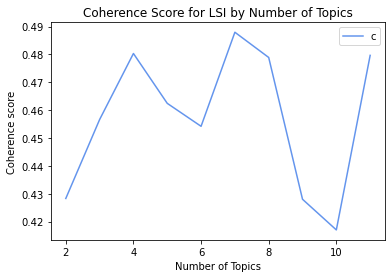

In [160]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

In [163]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

from gensim import models
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=8)

In [164]:
dictionary2 = corpora.Dictionary(tokens_cl)
corpus2 = [dictionary.doc2bow(text) for text in tokens_cl]

from gensim import models
lsi2 = models.LsiModel(corpus2, id2word=dictionary2, num_topics=8)

## Third Eye Blind

In [168]:
#df.text.iloc[9758]
#texts[9758]

In [169]:
doc = texts[9758]
vec_bow = dictionary.doc2bow(doc)
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

[(0, 4.185903045461339), (1, -0.31594383151525396), (2, -0.44989370745828333), (3, 0.7613894411326454), (4, -0.40683844124341123), (5, -0.04551662302662353), (6, -0.7586768780884915), (7, 0.5156944997881637)]


In [170]:
from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it


In [171]:
sims = index[vec_lsi]  # perform a similarity query against the corpus
print(len(sims) ) # print (document_number, document_similarity) 2-tuples

10693


In [172]:
df['TEB_lsi_score'] = sims

In [173]:
outline = df[ df.TEB_lsi_score > .95].sample(9)
outline[['artist', 'title']]

,artist,title
5755,The Ordinary Boys,All the Things She Said
6473,Lifehouse,Sky Is Falling
2857,Feeder,We Can't Rewind
8338,No Doubt,Sad For Me
9484,Switchfoot,Meant To Live
4847,PJ Harvey,Hardly Wait
3682,Anberlin,A Whisper & A Clamor
889,Train,I Am
7506,Spinnerette,Driving Song


In [174]:
# Bandabardò	Héros not found; replace with most popular song 
##df.iloc[9758, 8763, 6030, 7303, 4313, 10432, 9466, 94, 1119, 8222]

In [176]:
df.text.iloc[9758]
texts[9758]

doc = texts[9758]
vec_bow = dictionary.doc2bow(doc)
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

sims = index[vec_lsi]  # perform a similarity query against the corpus
print(len(sims) ) # print (document_number, document_similarity) 2-tuples

df['TEB_lsi_score_2'] = sims
outline = df[ df.TEB_lsi_score_2 > .98]
outline[['artist', 'title']]

#indices: 9758, 3986, 3246, 8839, 1243, 7449, 8321, 5448, 8967, 9990

[(0, 4.185903045461339), (1, -0.31594383151525396), (2, -0.44989370745828333), (3, 0.7613894411326454), (4, -0.40683844124341123), (5, -0.04551662302662353), (6, -0.7586768780884915), (7, 0.5156944997881637)]
10693


,artist,title
9758,Third Eye Blind,Losing A Whole Year (2006 Remastered LP Version)


In [177]:
### dict 2 

doc = tokens_cl[9758]
vec_bow2 = dictionary2.doc2bow(doc)
vec_lsi2 = lsi2[vec_bow2]  # convert the query to LSI space
print(vec_lsi2)

from gensim import similarities
index = similarities.MatrixSimilarity(lsi2[corpus2])  # transform corpus to LSI space and index it

sims2 = index[vec_lsi2]  # perform a similarity query against the corpus
print(len(sims2) ) # print (document_number, document_similarity) 2-tuples

df['RO_lsi_score_d2'] = sims2
outline = df[ df.RO_lsi_score_d2 > .95]
outline[['artist', 'title']]

[(0, -0.026853625685624303), (1, 0.011822268105938404), (2, 0.013608669330650785), (3, -0.004549388901760068), (4, -0.0063461043282109905), (5, 0.012051785175207434), (6, -0.0028604885461086136), (7, -0.01815133200969204)]
10693


,artist,title
3322,Tanya Donelly,Keeping You
4670,María Elena Walsh,El Reino Del Revés
8085,Shakira,Gitana
8667,Mysto Dysto,Tarantula (remastered version)


### Roy Orbison

In [178]:
df.text.iloc[8750]
texts[8750]

doc = texts[8750]
vec_bow = dictionary.doc2bow(doc)
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

sims = index[vec_lsi]  # perform a similarity query against the corpus
print(len(sims) ) # print (document_number, document_similarity) 2-tuples

df['RO_lsi_score'] = sims
outline = df[ df.RO_lsi_score > .95].sample(9)
outline[['artist', 'title']]

#indices: 8750, 6889, 6503, 2258, 10372, 9956, 10264, 8977, 9310, 2388

[(0, 11.794411550761485), (1, -3.6496048449333127), (2, 3.490377875206429), (3, 1.114981487554476), (4, -0.4919914876377699), (5, -5.209383238414349), (6, 3.390379415192502), (7, -5.065381205337404)]
10693


,artist,title
1474,Bob Dylan,With God On Our Side
2388,Toby Keith,As Good As I Once Was
42,Max Richter,H in New England
2245,Gaither Vocal Band,In That Great Getting' Up Morning
2282,Blue Öyster Cult,(Don't Fear) The Reaper
3025,Freda Payne,Band Of Gold
6641,Bob Dylan,Things Have Changed
7756,The Happenings,See You In September
6287,Andrés Calamaro,Tengo una orquídea


In [180]:
df.text.iloc[8750]
texts[8750]

doc = texts[8750]
vec_bow = dictionary.doc2bow(doc)
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

sims = index[vec_lsi]  # perform a similarity query against the corpus
print(len(sims) ) # print (document_number, document_similarity) 2-tuples

df['RO_lsi_score_2'] = sims
outline = df[ df.RO_lsi_score_2 > .98]
outline[['artist', 'title']]

#indices: 8750, 5385, 2463, 10105, 10372, 4837, 4546, 1353, 2411, 2258

[(0, 11.794411550761485), (1, -3.6496048449333127), (2, 3.490377875206429), (3, 1.114981487554476), (4, -0.4919914876377699), (5, -5.209383238414349), (6, 3.390379415192502), (7, -5.065381205337404)]
10693


,artist,title
8750,Roy Orbison,In Dreams
9310,Kris Kristofferson,Loving Her Was Easier (Than Anything I'll Ever...


### New Order

In [181]:
#df.text.iloc[10479]
#texts[10479]

doc = texts[10479]
vec_bow = dictionary.doc2bow(doc)
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

sims = index[vec_lsi]  # perform a similarity query against the corpus
print(len(sims) ) # print (document_number, document_similarity) 2-tuples

df['NO_lsi_score'] = sims
outline = df[ df.NO_lsi_score > .95].sample(9)
outline[['artist', 'title']]

#indices: 10179, 4593, 2781, 2428, 6576, 439, 7936, 3275, 5999, 9259 

[(0, 4.991520473469796), (1, -1.876401294483509), (2, 1.3224023346794025), (3, 2.0962904623310847), (4, -0.2585920147195954), (5, 3.6262431867095786), (6, -0.28963978177384203), (7, 0.3077480671163244)]
10693


,artist,title
9587,Vincent Vincent And The Villains,Blue Boy
7228,Junior Senior,White Trash
444,Propaganda,Dr. Mabuse
382,The White Tie Affair,Candle (Sick And Tired)
651,Depeche Mode,Told You So
4593,The Bees,Chicken Payback
1180,Wave Machines,Keep The Lights On
10479,New Order,Round and Round
5046,Busted,You Said No


In [183]:
df.text.iloc[10479]
texts[10479]

doc = texts[10479]
vec_bow = dictionary.doc2bow(doc)
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

sims = index[vec_lsi]  # perform a similarity query against the corpus
print(len(sims) ) # print (document_number, document_similarity) 2-tuples

df['NO_lsi_score_2'] = sims
outline = df[ df.NO_lsi_score_2 > .98]
outline[['artist', 'title']]

#indices: 10479, 4130, 3275, 6144, 9259, 5707, 4046, 9712, 4207, 5199 


[(0, 4.991520473469796), (1, -1.876401294483509), (2, 1.3224023346794025), (3, 2.0962904623310847), (4, -0.2585920147195954), (5, 3.6262431867095786), (6, -0.28963978177384203), (7, 0.3077480671163244)]
10693


,artist,title
444,Propaganda,Dr. Mabuse
2073,New Order,Close Range
2669,New Young Pony Club,"Talking, Talking"
7228,Junior Senior,White Trash
9712,A Flock Of Seagulls,Nightmares
10479,New Order,Round and Round


In [184]:
#could not find epsilon minus track, replaced with their most popular

In [185]:
####

# 4 topics

In [186]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

from gensim import models
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=4)

#### Third Eye Blind . .98, 4 subject

In [187]:
doc = texts[9758]
vec_bow = dictionary.doc2bow(doc)
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

sims = index[vec_lsi]  # perform a similarity query against the corpus
#print(len(sims) ) # print (document_number, document_similarity) 2-tuples

df['TEB_lsi_score_3'] = sims
outline = df[ df.TEB_lsi_score_3 > .98].sample(10)
outline[['artist', 'title']]

#indices: 9758, 224, 6911, 6011, 1286, 4906, 8263, 8384, 4875, 4856

[(0, 4.1859029700836805), (1, 0.31594562818100547), (2, 0.4498832201289584), (3, -0.7613609350117628)]


,artist,title
6911,Thousand Foot Krutch,Favorite Disease
3754,Fly My Pretties,Catch the Light
3509,Mando Diao,The Band
8967,Dead Kennedys,Moon Over Marin
6885,Poni Hoax,The Paper Bride
4856,Branford Marsalis,Sentinel
1016,Guttermouth,She's Got The Look
1319,Tenacious D,Inward Singing
8215,My Chemical Romance,Song 2
3014,Saosin,Voices (Acoustic)


#### Roy Orbison . .98, 4 subject

In [188]:
doc = texts[8750]
vec_bow = dictionary.doc2bow(doc)
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
#print(vec_lsi)

from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

sims = index[vec_lsi]  # perform a similarity query against the corpus
#print(len(sims) ) # print (document_number, document_similarity) 2-tuples

df['RO_lsi_score_3'] = sims
outline = df[ df.RO_lsi_score_3 > .98].sample(10)
outline[['artist', 'title']]

#indices: 8750, 10183, 8687, 2200, 5247, 2153, 2639, 3388, 7477, 9673, 9756

,artist,title
3388,Melanie,Any Guy
1281,Bellowhead,Kafoozalum / The Priest's Miss
5199,Sunscreem,Pressure
6366,Mogwai,R U Still in 2 It
7477,Kelly Clarkson,Never Again
6370,Jack's Mannequin,Annie Use Your Telescope
2073,New Order,Close Range
1854,Laurie Anderson,Strange Angels
10356,Bikini Kill,Rebel Girl
4068,Bratz,Change The World


#### New Order . .98, 4 subject

In [189]:
doc = texts[10479]
vec_bow = dictionary.doc2bow(doc)
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
#print(vec_lsi)

from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

sims = index[vec_lsi]  # perform a similarity query against the corpus
#print(len(sims) ) # print (document_number, document_similarity) 2-tuples

df['NO_lsi_score_3'] = sims
outline = df[ df.NO_lsi_score_3 > .98].sample(10)
outline[['artist', 'title']]

#indices: 10479, 7927, 5458, 7176, 10062, 7228, 513, 710, 4719, 8084, 3436

,artist,title
9055,Baustelle,Revolver
2428,Seachange,"Annie, Tacoma"
6624,Bandabardò,Finta Bionda
2491,Ida Maria,I Like You So Much Better When You're Naked
3105,Habib Koité,Africa
8773,The Dears,Whites Only Party
1310,China Crisis,Black Man Ray
10538,The Cure,The Upstairs Room
7137,Bow Wow Wow,What's The Time (Hey Buddy)
6417,Hope Partlow,Sick Inside


# 8 topics

In [190]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

from gensim import models
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=8)

#### Third Eye Blind > .97, 4 subject

In [191]:
doc = texts[9758]
vec_bow = dictionary.doc2bow(doc)
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
#print(vec_lsi)

from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

sims = index[vec_lsi]  # perform a similarity query against the corpus
#print(len(sims) ) # print (document_number, document_similarity) 2-tuples

df['TEB_lsi_score_4'] = sims
outline = df[ df.TEB_lsi_score_4 > .97].sample(10)
outline[['artist', 'title']]

#indices: 9758, 5342, 9925, 759, 7649, 9529, 7626, 5444, 8934, 2090

,artist,title
2090,Motion City Soundtrack,Hangman (Album Version)
9925,Eyes Set To Kill,Ticking Bombs
759,Bikini Kill,Jet Ski
1543,Between the Trees,Darlin'
8934,Maxïmo Park,Karaoke Plays
6203,My Latest Novel,"Wrongfully, I Rested"
2857,Feeder,We Can't Rewind
5444,Chetes,Regresa
7626,The Fratellis,Mistress Mabel
4605,The Delgados,Never Look At The Sun


#### Roy Orbison . .96, 4 subject

In [192]:
# doc = texts[8750]
vec_bow = dictionary.doc2bow(doc)
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
#print(vec_lsi)

from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

sims = index[vec_lsi]  # perform a similarity query against the corpus
#print(len(sims) ) # print (document_number, document_similarity) 2-tuples

df['RO_lsi_score_4'] = sims
outline = df[ df.RO_lsi_score_4 > .96].sample(10)
outline[['artist', 'title']]

#indices: 8750,1353, 8977, 6641, 1742, 2258, 1762, 9310, 2463, 10263

,artist,title
4605,The Delgados,Never Look At The Sun
3130,Supergrass,Alright
6596,Dashboard Confessional,Reason To Believe
1649,Kashmir,Kalifornia
1945,Adam Green,Carolina
1672,The Crimea,Lottery Winners On Acid
1543,Between the Trees,Darlin'
9806,Biffy Clyro,Many Of Horror
7579,Wilco,Muzzle of Bees
7833,Plastiscines,I Am Down


#### New Order . .96, 4 subject

In [193]:
doc = texts[10479]
vec_bow = dictionary.doc2bow(doc)
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
#print(vec_lsi)

from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

sims = index[vec_lsi]  # perform a similarity query against the corpus
#print(len(sims) ) # print (document_number, document_similarity) 2-tuples

df['NO_lsi_score_4'] = sims
outline = df[ df.NO_lsi_score_4 > .96].sample(10)
outline[['artist', 'title']]

#indices: 10479, 444, 11, 4593, 2669, 9712, 5705, 3275, 10479, 7228, 3203

,artist,title
9712,A Flock Of Seagulls,Nightmares
2669,New Young Pony Club,"Talking, Talking"
11,Cut Copy,So Haunted
651,Depeche Mode,Told You So
2073,New Order,Close Range
10479,New Order,Round and Round
3275,Scissor Sisters,I Don't Feel Like Dancin'
382,The White Tie Affair,Candle (Sick And Tired)
4593,The Bees,Chicken Payback
3203,The Lovely Feathers,Frantic


In [194]:
df.to_csv('ldi_similarity_scores.csv')

# Some EDA 

In [195]:
df.listed_tags

0        [[tropicalia, 100], [mpb, 100], [energizing, 1...
1        [[rock, 100], [acoustic, 100], [indie, 100], [...
2        [[jytakampaa, 100], [aerodance, 100], [beatful...
3        [[experimental, 100], [alternative, 60], [indi...
4        [[80s, 100], [new wave, 60], [sting, 53], [new...
                               ...                        
10688    [[trance, 100], [dance, 36], [chillout, 27], [...
10689    [[rock, 100], [singer-songwriter, 72], [house ...
10690    [[rock, 100], [Canadian, 66], [blues, 33], [al...
10691    [[jazz, 100], [jazz vocal, 100], [Blues Bar, 1...
10692    [[dance, 100], [electro house, 100], [House, 6...
Name: listed_tags, Length: 10693, dtype: object

In [196]:
tags = [] 

for i, row in df.iterrows():
    for g in row.listed_tags:
        #print(g[0])
        tags.append(g[0])

In [197]:
from collections import Counter

count = Counter(tags)
topn = count.most_common(50)
topn[0]

('rock', 2201)

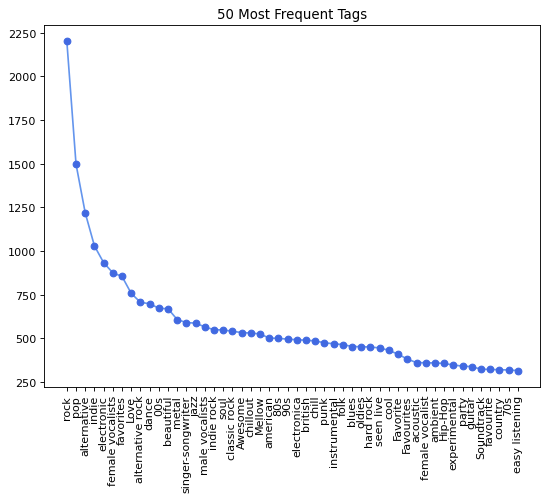

<Figure size 432x288 with 0 Axes>

In [198]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

x_val = [x[0] for x in topn]
y_val = [x[1] for x in topn]


plt.plot(x_val,y_val, color = 'cornflowerblue')
plt.plot(x_val,y_val,'or', color = 'royalblue')
plt.title('50 Most Frequent Tags')
plt.set_cmap('twilight')
plt.xticks(rotation=90)
plt.show()
plt.savefig('50 Most Frequent Tags.jpg')


In [199]:
lown = count.most_common()[:-50]
lown[0]

('rock', 2201)

In [200]:
modif_df = df.copy()

In [201]:
cleaned_tags = []
for i, row in modif_df.iterrows():
    new_tags = []
    for g in row.listed_tags:
        if g[0] not in tag_genre_to_replace:
            new_tags.append(g)
    cleaned_tags.append(new_tags)

print(len(cleaned_tags))

10693


In [202]:
modif_df['listed_tags'] = cleaned_tags

In [203]:
modif_df

,Unnamed: 0,Unnamed: 0.1,artist,timestamp,similars,tags,track_id,title,listed_tags,listed_sims,...,RO_lsi_score,RO_lsi_score_2,NO_lsi_score,NO_lsi_score_2,TEB_lsi_score_3,RO_lsi_score_3,NO_lsi_score_3,TEB_lsi_score_4,RO_lsi_score_4,NO_lsi_score_4
0,70530,70530,Caetano Veloso,2011-08-10 11:20:56.295466,"[['TRYNMZY12903CA8E1E', 0.541769], ['TRXNTAD12...","[['tropicalia', '100'], ['mpb', '100'], ['ener...",TRJZGTA128F9312D1F,A Luz De Tieta,"[[tropicalia, 100], [mpb, 100], [energizing, 1...","[[TRYNMZY12903CA8E1E, 0.541769], [TRXNTAD128F4...",...,0.671620,0.671620,0.746400,0.746400,0.587655,0.875898,0.806741,0.435761,0.435761,0.746728
1,50410,50410,The Pretenders,2011-08-11 06:36:45.175755,[],"[['rock', '100'], ['acoustic', '100'], ['indie...",TRODUVR128F92E2329,Nothing Breaks Like a Heart,"[[reggae, 100], [new wave, 100], [female vocal...",[],...,0.434531,0.434531,0.732019,0.732019,0.948460,0.946270,0.893116,0.862757,0.862757,0.732084
2,132834,132834,Ultrabeat,2011-08-03 15:03:28.354306,"[['TRKTBLX128F428412B', 0.90692], ['TRZBKSJ128...","[['jytakampaa', '100'], ['aerodance', '100'], ...",TRVNTSO128F4284128,1000 Kisses,"[[jytakampaa, 100], [aerodance, 100], [beatful...","[[TRKTBLX128F428412B, 0.90692], [TRZBKSJ128F42...",...,-0.004706,-0.004706,0.454101,0.454101,0.231160,0.415860,0.150495,0.052019,0.052019,0.453590
3,177084,177084,Holy Fuck,2011-08-08 16:05:11.997170,"[['TRBFCSM128F42629F1', 1], ['TRDZTKM128F42629...","[['experimental', '100'], ['alternative', '60'...",TRXJUGX128F42629F8,Bontempi Latin,"[[experimental, 100], [indietronica, 50], [pos...","[[TRBFCSM128F42629F1, 1], [TRDZTKM128F42629E7,...",...,0.305738,0.305738,0.617331,0.617331,0.611882,0.743870,0.529081,0.511281,0.511281,0.617280
4,58690,58690,Arcadia,2011-08-04 07:03:34.630701,"[['TRNQLBS128F14571A9', 1], ['TRDLWLL128F14571...","[['80s', '100'], ['new wave', '60'], ['sting',...",TROKVJE128F14571A8,The Promise,"[[80s, 100], [new wave, 60], [sting, 53], [new...","[[TRNQLBS128F14571A9, 1], [TRDLWLL128F14571A6,...",...,0.346939,0.346939,0.839081,0.839081,0.961366,0.960324,0.941764,0.757374,0.757374,0.839100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10688,169069,169069,ATB,2011-08-15 11:43:14.442246,"[['TRRDUAO128F14A03E2', 0.896112], ['TRRRTTF12...","[['trance', '100'], ['dance', '36'], ['chillou...",TRXTCJX128F14A03D7,Gentle Melody,"[[trance, 100], [chillout, 27], [House, 27], [...","[[TRRDUAO128F14A03E2, 0.896112], [TRRRTTF128F9...",...,0.358266,0.358266,0.690748,0.690748,0.495964,0.797711,0.767045,0.174319,0.174319,0.690706
10689,18709,18709,Leon Russell,2011-08-16 01:20:24.691574,"[['TRGBOGS128F92C1E7C', 0.932304], ['TREUSOF12...","[['rock', '100'], ['singer-songwriter', '72'],...",TRSDNCP128F92FAACA,Stranger In A Strange Land,"[[house md, 72], [piano rock, 55], [Leon Russe...","[[TRGBOGS128F92C1E7C, 0.932304], [TREUSOF128E0...",...,0.807113,0.807113,0.511598,0.511598,0.890497,0.851475,0.734370,0.731697,0.731697,0.511548
10690,113147,113147,Big Sugar,2011-08-04 22:25:03.454069,"[['TRQDZOA128F1467F9F', 0.135547], ['TRBLFCI12...","[['rock', '100'], ['Canadian', '66'], ['blues'...",TRDJFUW12903CE4271,Dear Mr. Fantasy,"[[Canadian, 66], [favorites, 33], [covers that...","[[TRQDZOA128F1467F9F, 0.135547], [TRBLFCI128F9...",...,0.713066,0.713066,0.521495,0.521495,0.887979,0.767226,0.678782,0.808432,0.808432,0.521425
10691,47945,47945,Lorez Alexandria,2011-08-01 14:43:12.453855,"[['TRDPDRG128F9316A63', 1], ['TRDBZWP128F9316A...","[['jazz', '100'], ['jazz vocal', '100'], ['Blu...",TROJRHA128F9316A67,Angel Eyes,"[[jazz vocal, 100], [Blues Bar, 100]]","[[TRDPDRG128F9316A63, 1], [TRDBZWP128F9316A6A,...",...,0.096348,0.096348,-0.121482,-0.121482,-0.093026,0.111834,-0.161729,-0.059025,-0.059025,-0.121507


In [204]:
from collections import Counter

tags = [] 

for i, row in modif_df.iterrows():
    for g in row.listed_tags:
        #print(g[0])
        tags.append(g[0])

count = Counter(tags)
topn = count.most_common(50)

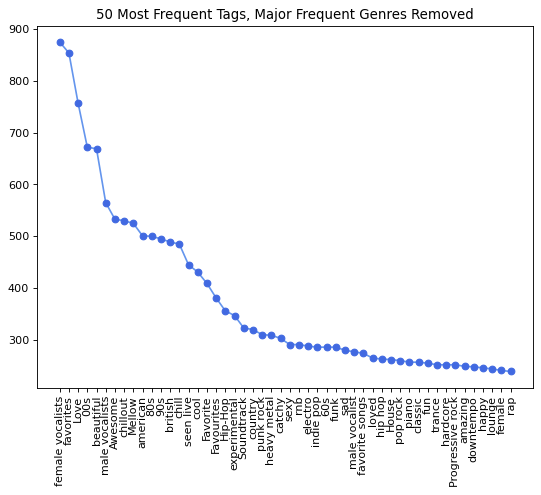

<Figure size 432x288 with 0 Axes>

In [205]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

x_val = [x[0] for x in topn]
y_val = [x[1] for x in topn]

plt.plot(x_val,y_val, color = 'cornflowerblue')
plt.plot(x_val,y_val,'or', color = 'royalblue')
plt.title('50 Most Frequent Tags, Major Frequent Genres Removed')
plt.xticks(rotation=90)
plt.show()
plt.savefig('50Most Frequent Tags, Major Frequent Genres Removed.jpg')

### After removal of high frequency genre tags, I reran the methods that utilized tags to compare recommended tracks for variations. 